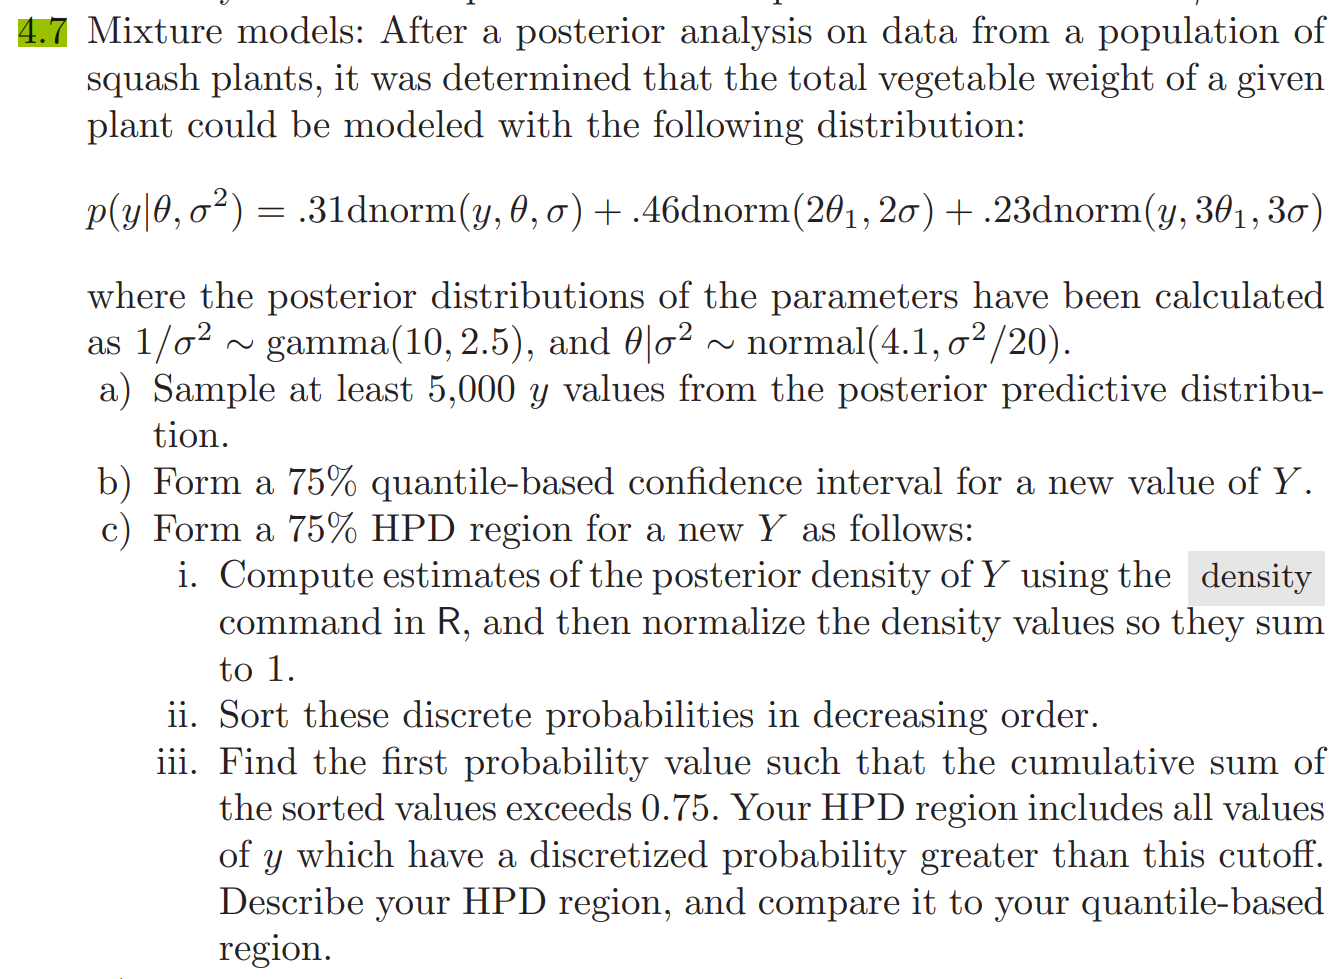

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, gamma, gaussian_kde
import matplotlib.pyplot as plt
from random import random, seed

In [2]:
sigma_mc = gamma.rvs(a=10, scale=1/2.5, size=30)

theta_mc = []
for i in range(len(sigma_mc)):
    theta_mc.append(norm.rvs(loc=4.1, scale = np.sqrt((1/sigma_mc[i])/20), size=30))

y_mc = []
for i in range(len(sigma_mc)):
    sigma = sigma_mc[i]
    for j in range(len(theta_mc[i])):
        theta = theta_mc[i][j]
        y_mc.append(0.31 * norm.rvs(loc = theta, scale = np.sqrt(1/sigma_mc[i]), size = 30) + 
                    0.46 * norm.rvs(loc = 2 * theta, scale = 2 * np.sqrt(1/sigma_mc[i]), size = 30) +
                    0.23 * norm.rvs(loc = 3 * theta, scale = 3 * np.sqrt(1/sigma_mc[i]), size = 30))
        
np.array(y_mc).shape

(900, 30)

In [3]:
y_mc = np.array(y_mc).flatten()
y_mc.shape

(27000,)

### 75% credible interval을 위해서는 왼쪽 12.5% quantile, 오른쪽 87.5% quantile이 필요

In [4]:
Cred_int = (np.quantile(y_mc, 0.125), np.quantile(y_mc, 0.875))

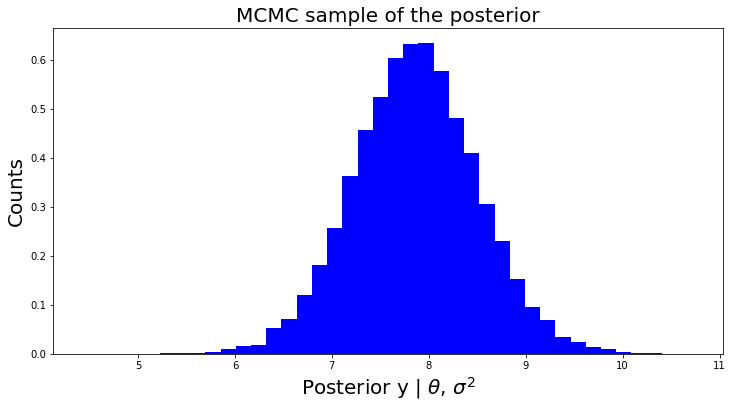

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(y_mc, bins = 40, color = 'blue', density = True)
plt.xlabel(r'Posterior y | $\theta$, $\sigma^2$', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('MCMC sample of the posterior', fontsize = 20)
plt.show()

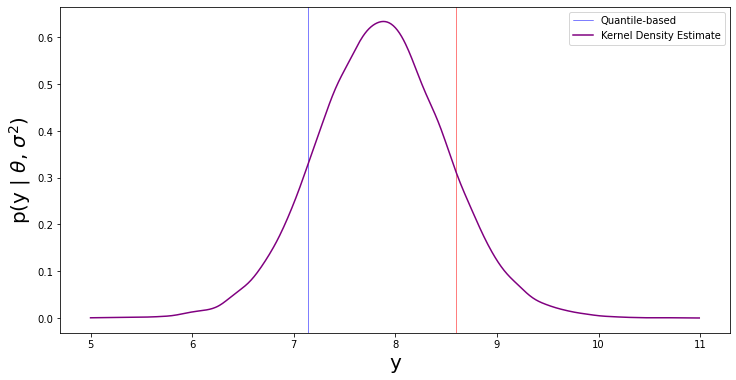

In [6]:
y = np.arange(5, 11, 0.01)
kde = gaussian_kde(y_mc, bw_method='silverman')
pdf_kde = kde(y)

plt.figure(figsize=(12, 6))
plt.axvline(x=Cred_int[0], color='blue', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=Cred_int[1], color='red', linewidth=0.5)
plt.plot(y, pdf_kde, color='purple', label='Kernel Density Estimate')

plt.xlabel('y', fontsize = 20)
plt.ylabel(r'p(y | $\theta$, $\sigma^2$)', fontsize = 20)
plt.legend()
plt.show()

In [7]:
pdf_sort = pdf_kde.copy()
pdf_sort.sort()
pdf_sort = pdf_sort[::-1]

https://people.stat.sc.edu/hitchcock/stat535slidesday3.pdf

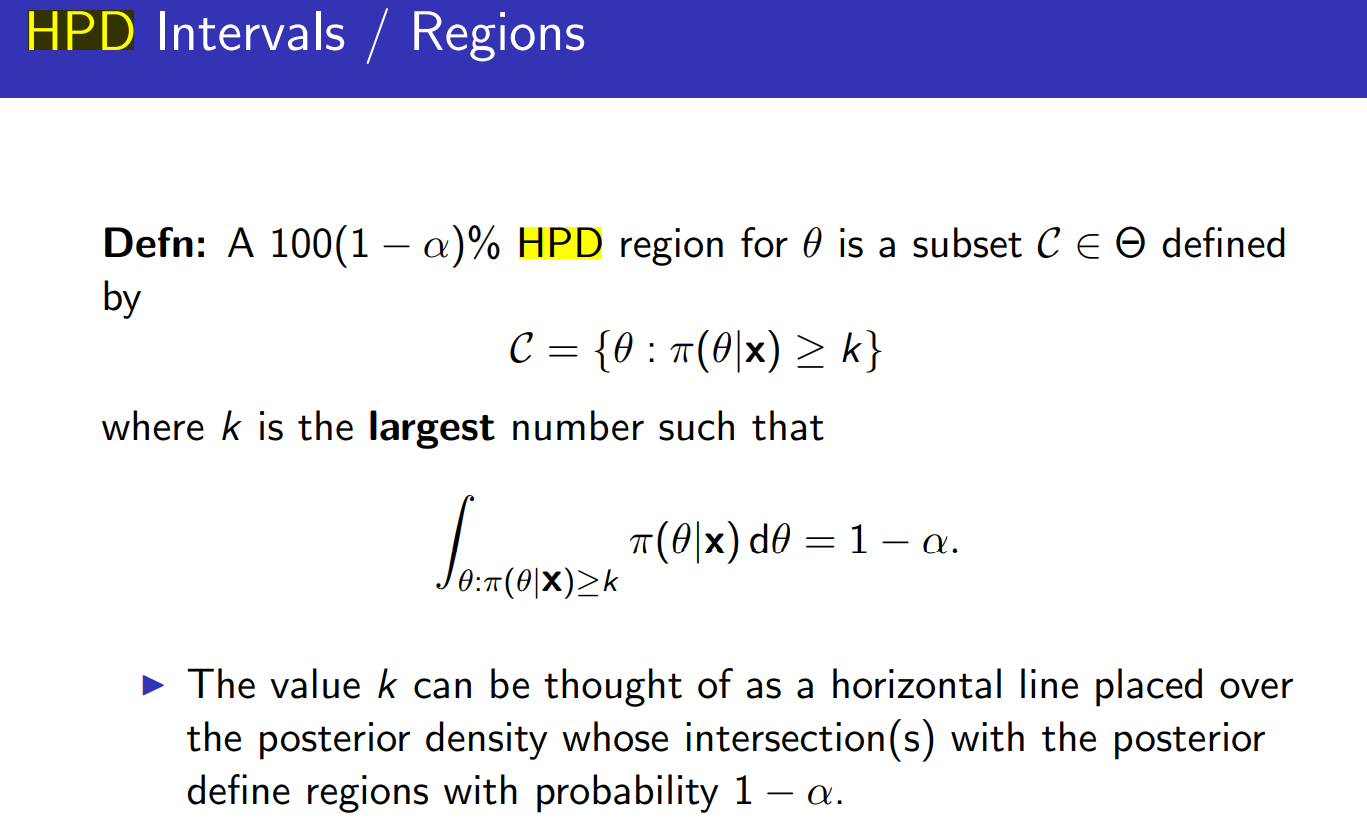

In [8]:
i = 0

while True:
    i += 1
    if (0.01 * pdf_sort[0:i].sum()>= 0.75):    
        break
        
pdf_HPD1 = pdf_sort[i-1]
pdf_HPD2 = pdf_sort[i]

In [9]:
CI_HPD = (np.round(y[np.where(pdf_kde == pdf_HPD1)][0],2), np.round(y[np.where(pdf_kde == pdf_HPD2)][0],2))

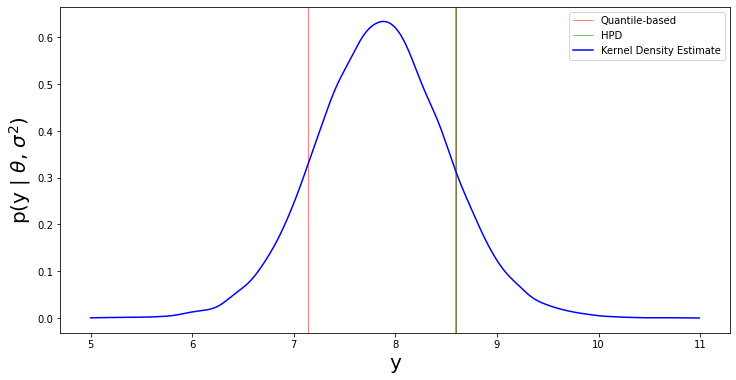

In [10]:
plt.figure(figsize=(12, 6))

plt.axvline(x = Cred_int[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x = Cred_int[1], color='r', linewidth=0.5)
plt.axvline(x = CI_HPD[0], color='g', linewidth=0.5, label = "HPD")
plt.axvline(x = CI_HPD[1], color='g', linewidth=0.5)
plt.plot(y, pdf_kde, color='blue', label='Kernel Density Estimate')

plt.xlabel('y', fontsize = 20)
plt.ylabel(r'p(y | $\theta$, $\sigma^2$)', fontsize = 20)
plt.legend()
plt.show()